## Экспоненциальное распределение


### Сгенерируем выборку длины 1000

In [121]:
from scipy.stats import expon
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import numpy as np

# Генератор выборки длинны n
def generate(n):
    return expon.rvs(size=n)

# Константы
N = 1000

# Выборка размера 1000
main_sample = generate(N)

### Построим гистограмму выборки и теоретическую плотность распределения

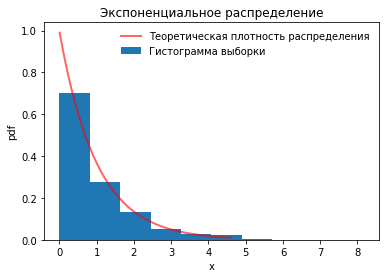

In [124]:
# Строим гистограмму выборки и рисуем поверх неё теоретическую плотность распределения случайной величины 
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
       'r-', lw=2, alpha=0.6, label='Теоретическая плотность распределения')
ax.hist(main_sample, density=True, label='Гистограмма выборки')
ax.legend(loc='best', frameon=False)
plt.title('Экспоненциальное распределение')
plt.xlabel('x')
plt.ylabel('pdf')
plt.show()

### Математическое ожидание и дисперсию для каждого размера выборки [5, 10, 50]

In [128]:
# Функция генерация выборки размера n из изначальной выборки
def sample(n):
    return np.random.choice(main_sample, n)

# Лист размеров выборок
choice = [5, 10, 50]

# Считаем среднее и дисперсию 
mean = expon.mean()
variances = list(map(lambda x: expon.var()/x, choice))

print(f'Математическое ожидание: {mean}')
for x in range(len(variances)):
    print(f'Дисперсия при n = {choice[x]}: {variances[x]}')

Математическое ожидание: 1.0
Дисперсия при n = 5: 0.2
Дисперсия при n = 10: 0.1
Дисперсия при n = 50: 0.02


### Строим гистограммы выборочных средних и рисуем плотность соответствующего нормального распределения

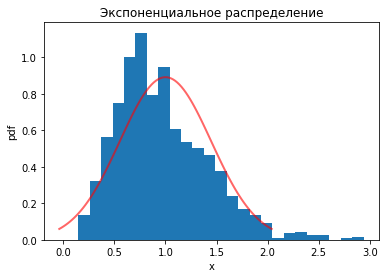

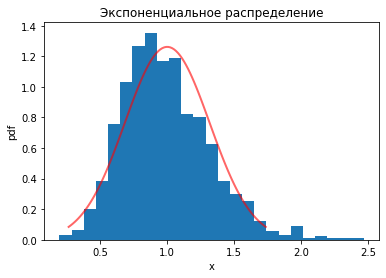

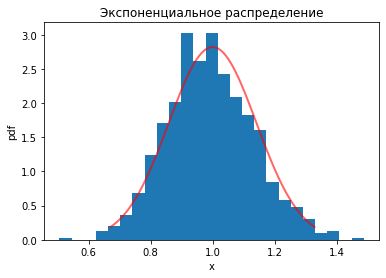

In [131]:
# Перебираем размеры 
for index, current_size in enumerate(choice):
    density = []
    fig, ax = plt.subplots(1, 1)
    # Создаем по 1000 выборок, считаем среднее
    for j in range(N):
        list_x = sample(current_size)
        density.append(np.average(list_x))
    
    # Рисуем гистограму по средним значениям 
    ax.hist(density, density=True, bins=25)

    # Рисуем нормальное распределение
    standard_deviation = math.sqrt(variances[index])
    x = np.linspace(norm.ppf(0.01, mean, standard_deviation),
                    norm.ppf(0.99, mean, standard_deviation), 100)
    ax.plot(x, norm.pdf(x, mean, standard_deviation),
           'r-', lw=2, alpha=0.6)
    plt.title('Экспоненциальное распределение')
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()

# Вывод:

#### С увеличением n точность нормальной аппроксимации растет.